# ML CHALLENGE

# Import packages and config

In [ ]:
## General packages
import pandas as pd
import numpy as np
import os
import math
#from google.colab import drive
from pandas_profiling import ProfileReport
import matplotlib as mpl
import matplotlib.pyplot as plt

## Machine learning packages
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV # Revisar esta librería.
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

## Neural networks packages
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
from keras import layers, models
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.constraints import maxnorm
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

## Validación
from sklearn.pipeline import Pipeline, FeatureUnion

In [ ]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=d923a5d0863f157aafc43014ae000b593f7c9f9d92da0d23187de52514165b1d
  Stored in directory: c:\users\facosta\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [ ]:
#drive.mount('/content/drive', force_remount= True)
#os.chdir('/content/drive/MyDrive/Asesoftware/Plan semilla/ML Challenge')
os.listdir("./")

['.ipynb_checkpoints',
 'Data',
 'Data_tree.csv',
 'Examples',
 'Labels_tree.csv',
 'Logistic_regression.ipynb',
 'model.png',
 'requirements.txt',
 'Results',
 'Spotify challenge.ipynb',
 'SVM.ipynb']

In [ ]:
DATA_PATH = './Data/'
RESULTS_PATH = './Results/'

In [ ]:
os.listdir(DATA_PATH)

['final_data.csv', 'songs_genres.csv', 'standirezed_data.csv']

# Data preprocessing

In [ ]:
songs_genres = pd.read_csv(DATA_PATH + "songs_genres.csv")
df = pd.read_csv(DATA_PATH + "final_data.csv", index_col = False)

songs_genres.genre_id.unique()
songs_genres.drop_duplicates(inplace = True)
songs_genres = shuffle(songs_genres)

print(songs_genres.value_counts().sum())
songs_genres.drop_duplicates(subset = ['track_id'],keep = 'first',inplace = True)
# TODO plot the distribution
print(songs_genres.genre_id.value_counts())
print(songs_genres.value_counts().sum())

df = df[['artist', 'artist_id', 'track_id', 'track_name', 'duration_ms', 'key','time_signature','mode_Major','mode_Minor', 'acousticness', 'instrumentalness', 'liveness',
       'loudness', 'tempo', 'speechiness', 'valence', 'modulation','singability', 'chillness', 'danceability', 'energy', 'popularity']]
df = df.merge(songs_genres, on = 'track_id').drop(['modulation','chillness'],axis=1)

227294
7.0     9675
25.0    9019
3.0     8739
10.0    8725
21.0    8703
6.0     8629
26.0    8466
23.0    8462
14.0    8250
20.0    8195
16.0    8074
4.0     7952
15.0    7631
8.0     7474
11.0    6338
24.0    6298
9.0     5044
18.0    5023
12.0    4828
13.0    4823
22.0    4587
2.0     4311
17.0    4243
19.0    4178
5.0     3580
1.0      119
Name: genre_id, dtype: int64
171366


In [ ]:
feature_correlation = df.corr()['genre_id']
feature_correlation#.style.background_gradient(cmap='coolwarm')

artist_id          -0.000706
duration_ms        -0.035978
mode_Major         -0.019946
mode_Minor          0.015385
acousticness       -0.044839
instrumentalness    0.044836
liveness           -0.133149
loudness           -0.023706
tempo              -0.004844
speechiness        -0.186833
valence            -0.007136
singability        -0.007794
danceability        0.007783
energy             -0.079181
popularity          0.059177
genre_id            1.000000
Name: genre_id, dtype: float64

In [ ]:
df[df['instrumentalness'] > 1]

,artist,artist_id,track_id,track_name,duration_ms,key,time_signature,mode_Major,mode_Minor,acousticness,...,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id
94763,The Arrogant Sons Of Bitches,12396.0,6luidVWKHWkZDmChOiKCXh,Melon Country,155200,E,4/4,1,0,0.123,...,0.346,-1.721,100.215,0.209,0.69,0.547,0.453,0.987,14.0,23.0


In [ ]:
## Normalizar: [0,1] x/max(x), Estandarizar media=0 y varianza=1, formula = (x-mean)/std
## Remove negatives, normalize/estandarizar
## Negatives: loudness, chillness, popularity
## MAX(normalize) : duration_ms, artist_id, instrumentalness, loudness, tempo, popularity
df = df[df['instrumentalness'] < 1]
df1 = df.copy()

In [ ]:
# SCALE THE DATA
df[['duration_ms','instrumentalness','tempo', 'loudness', 'popularity']] = MinMaxScaler().fit_transform(df[
    ['duration_ms','instrumentalness','tempo', 'loudness', 'popularity']])
df.describe()

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id
count,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.00000,171365.000000,171365.000000,171365.000000,171365.000000
mean,7109.532711,0.040373,0.398384,0.213737,0.398231,0.173144,0.226414,0.265707,0.104646,0.127715,0.444521,0.46387,0.536132,0.562068,0.596195,14.162489
std,4142.170936,0.023618,0.489567,0.409944,0.366278,0.323799,0.212667,0.040527,0.037972,0.205483,0.265596,0.18928,0.189280,0.276255,0.107923,7.376645
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009670,0.000000,0.000000,0.022200,0.000000,0.01300,0.056900,0.000020,0.000000,1.000000
25%,3671.000000,0.029938,0.000000,0.000000,0.042600,0.000000,0.097900,0.248951,0.074327,0.036800,0.216000,0.32200,0.411000,0.353000,0.522581,7.000000
50%,6838.000000,0.037151,0.000000,0.000000,0.274000,0.000077,0.131000,0.278307,0.102086,0.049300,0.431000,0.44700,0.553000,0.601000,0.600000,14.000000
75%,10612.000000,0.046038,1.000000,0.000000,0.786000,0.095295,0.280000,0.293998,0.130963,0.101000,0.657000,0.58900,0.678000,0.794000,0.670968,21.000000
max,14561.000000,1.000000,1.000000,1.000000,0.996000,1.000000,1.000000,1.000000,1.000000,0.967000,1.000000,0.94310,0.987000,0.999000,1.000000,26.000000


In [ ]:
df2 = pd.get_dummies(df.drop(['artist','track_id','track_name'], axis = 1))
df3 = pd.get_dummies(df1.drop(['artist','track_id','track_name'], axis = 1))
df4 = pd.DataFrame(StandardScaler().fit_transform(df3.values), columns = df3.columns)

In [ ]:
df2.to_csv(DATA_PATH + "normalised_data.csv", index = False)
df4.to_csv(DATA_PATH + "standarised_data.csv", index = False)

In [ ]:
df2.describe()

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,...,key_E,key_F,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
count,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,...,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000
mean,7109.532711,0.040373,0.398384,0.213737,0.398231,0.173144,0.226414,0.265707,0.104646,0.127715,...,0.075873,0.087480,0.065527,0.114615,0.063870,0.000035,0.013299,0.116803,0.844507,0.025355
std,4142.170936,0.023618,0.489567,0.409944,0.366278,0.323799,0.212667,0.040527,0.037972,0.205483,...,0.264796,0.282538,0.247454,0.318558,0.244521,0.005917,0.114553,0.321187,0.362375,0.157202
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009670,0.000000,0.000000,0.022200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3671.000000,0.029938,0.000000,0.000000,0.042600,0.000000,0.097900,0.248951,0.074327,0.036800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,6838.000000,0.037151,0.000000,0.000000,0.274000,0.000077,0.131000,0.278307,0.102086,0.049300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,10612.000000,0.046038,1.000000,0.000000,0.786000,0.095295,0.280000,0.293998,0.130963,0.101000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,14561.000000,1.000000,1.000000,1.000000,0.996000,1.000000,1.000000,1.000000,1.000000,0.967000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df4.describe()

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,...,key_E,key_F,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
count,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,...,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05
mean,2.594640e-15,-2.395901e-16,-5.575427e-15,1.068886e-13,2.274226e-16,1.665426e-13,-8.119163e-16,7.958404e-15,7.570857e-16,-3.933741e-15,...,3.709744e-15,2.288936e-14,-9.821600e-15,3.405346e-14,-1.076782e-14,-5.942662e-15,5.443087e-14,1.420109e-14,9.387969e-14,-5.489753e-14
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.716142e+00,-1.709397e+00,-8.137497e-01,-5.213815e-01,-1.087238e+00,-5.347278e-01,-1.019176e+00,-6.556338e+00,-2.755835e+00,-5.134976e-01,...,-2.865354e-01,-3.096229e-01,-2.648049e-01,-3.597946e-01,-2.612033e-01,-5.917281e-03,-1.160963e-01,-3.636628e-01,-2.330487e+00,-1.612912e-01
25%,-8.301306e-01,-4.418111e-01,-8.137497e-01,-5.213815e-01,-9.709330e-01,-5.347278e-01,-6.042997e-01,-4.134424e-01,-7.984354e-01,-4.424452e-01,...,-2.865354e-01,-3.096229e-01,-2.648049e-01,-3.597946e-01,-2.612033e-01,-5.917281e-03,-1.160963e-01,-3.636628e-01,4.290948e-01,-1.612912e-01
50%,-6.555343e-02,-1.364469e-01,-8.137497e-01,-5.213815e-01,-3.391712e-01,-5.344907e-01,-4.486565e-01,3.109169e-01,-6.739400e-02,-3.816127e-01,...,-2.865354e-01,-3.096229e-01,-2.648049e-01,-3.597946e-01,-2.612033e-01,-5.917281e-03,-1.160963e-01,-3.636628e-01,4.290948e-01,-1.612912e-01
75%,8.455657e-01,2.398506e-01,1.228879e+00,-5.213815e-01,1.058677e+00,-2.404233e-01,2.519728e-01,6.980878e-01,6.930773e-01,-1.300093e-01,...,-2.865354e-01,-3.096229e-01,-2.648049e-01,-3.597946e-01,-2.612033e-01,-5.917281e-03,-1.160963e-01,-3.636628e-01,4.290948e-01,-1.612912e-01
max,1.798933e+00,4.063044e+01,1.228879e+00,1.917981e+00,1.632013e+00,2.553614e+00,3.637564e+00,1.811877e+01,2.357910e+01,4.084468e+00,...,3.489971e+00,3.229736e+00,3.776365e+00,2.779363e+00,3.828436e+00,1.689965e+02,8.613540e+00,2.749800e+00,4.290948e-01,6.199967e+00


In [ ]:
df2.corr()['genre_id']

artist_id            -0.000715
duration_ms          -0.035973
mode_Major           -0.019955
mode_Minor            0.015389
acousticness         -0.044834
instrumentalness      0.044761
liveness             -0.133154
loudness             -0.023716
tempo                -0.004840
speechiness          -0.186837
valence              -0.007142
singability          -0.007798
danceability          0.007786
energy               -0.079193
popularity            0.059187
genre_id              1.000000
key_A                 0.014847
key_A#                0.000926
key_B                 0.005776
key_C                 0.024265
key_C#               -0.018897
key_D                 0.005314
key_D#               -0.019675
key_E                -0.005974
key_F                -0.003984
key_F#               -0.022198
key_G                 0.006242
key_G#               -0.001027
time_signature_0/4    0.000672
time_signature_1/4   -0.017426
time_signature_3/4   -0.035872
time_signature_4/4    0.042316
time_sig

In [ ]:
### Train test split FOR NUMERICAL ALGORITHMS: 20% test
X = df4.drop(['artist_id', 'genre_id'],  axis = 1)
#X = df2.drop(['artist_id', 'genre_id'],  axis = 1)
y = df['genre_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1234, stratify = y_train)

In [ ]:
y_train.value_counts()

7.0     6192
25.0    5766
10.0    5615
3.0     5591
21.0    5578
6.0     5507
26.0    5397
23.0    5396
20.0    5262
14.0    5260
16.0    5172
4.0     5111
15.0    4899
8.0     4762
11.0    4082
24.0    4039
18.0    3223
9.0     3188
13.0    3112
12.0    3083
22.0    2869
2.0     2790
17.0    2769
19.0    2689
5.0     2245
1.0       76
Name: genre_id, dtype: int64

In [ ]:
### Train test split FOR CATEGORICAL ALGORITHMS: 20% test
#X = df.drop(['genre_id'])
#y = df['genre_id']
#XC_train, XC_test, yc_train, yc_test = train_test_split(X, y, test_size = 0.2, random_state = 1234, stratify = y)

In [ ]:
y_train

133368     8.0
122697    21.0
13072      9.0
117095    21.0
154877    25.0
          ... 
124826    26.0
137119     8.0
87479      3.0
156221    16.0
4337       2.0
Name: genre_id, Length: 109673, dtype: float64

# Logisitc regression

#### Results (performance)

# SVM

#### Results (performance)

# Decision Tree



#### Results performance

# Neuronal network

In [ ]:
# Dimensiones matrices
print(X_train.shape, y_train.shape)

input_dim = X_train.shape[1]

(109673, 31) (109673,)


In [ ]:
# Tuneo
# Optimizer, loss, layers number, neurons per each layer, batch size, epochs

In [ ]:
def build_model(
    activation: str = "relu", units: list = [32 64 16], 
    optimizer: str = "adam", hiden_layers: int = 2
) -> tf.keras.Sequential:
    """
    Function to create a model by params
    :param activation: the activation function
    :type activation: str
    :param units: The number of neurons per layer
    :type units: int
    :param optimizer: The optimizer function
    :type optimizer: str
    :return: The model created with the defined params
    :rtype: tf.keras.Sequential
    """
    layers = []
    layers.append(tf.keras.layers.Dense(31, activation=activation))
    for i in range(0,hiden_layers):
        layers.append(tf.keras.layers.Dense(units, activation=activation))
    layers.append(tf.keras.layers.Dense(26,activation='softmax'))

    print(layers)

    model = tf.keras.Sequential(layers)
    ##loss = 'mse'
    model.compile(optimizer=optimizer, loss="categorical_crossentropy")
    return model

SyntaxError: invalid syntax (<ipython-input-265-251a4bec0657>, line 2)

In [ ]:
# Function to create model, required for KerasClassifier
def create_model(
    # Default values
    activation: 'relu',
    dropout_rate: 0.0,
    #init_mode: 'uniform',
    weight_constraint: 1,
    #optimizer: 'sgd',
    #learn_rate: 0.01,
    hiden_layers: 2,
    units: [2, 2]
) -> tf.keras.Sequential:
    
    # Create the model
    model = Sequential()
    model.add(Dense(31, input_dim = input_dim, kernel_initializer =  init_mode, activation = activation,
                   kernel_constraint = maxnorm(weight_constraint)))
    
    for i in range(hiden_layers):
        model.add(Dense(units = units[i], activation = activation))
        
    model.add(Dropout(dropout_rate))
    model.add(Dense(27, kernel_initializer = init_mode, activation = 'softmax'))
    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [ ]:
# Create model
model = KerasClassifier(build_fn = create_model)

In [ ]:
param_grid = {
    "activation": ["selu"],
    #"learn_rate": [0.1, 0.2],
    #"init_mode": ["he"],
    "weight_constraint": [3],
    "dropout_rate": [0.05],
    "units": [[64, 32, 16, 32, 64], [16, 32, 64, 32, 16]],
    #"optimizer": ["sgd"],
    "hiden_layers": [5],
    "epochs": [20],
    "batch_size": [128]
}

activation = ["relu", "linear"]
learn_rate = [0.1, 0.2]
dropout_rate = [0.01, 0.05]
units = [16, 32]
optimizer = ["adam", "rmsprop"]
hiden_layers = [2]
epochs = [20]
batch_size = [128, 256]

params_grid = dict(epochs = epochs, batch_size = batch_size, activation = activation, learn_rate = learn_rate,
                   dropout_rate = dropout_rate, units = units, optimizer = optimizer, hiden_layers = hiden_layers)

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = "accuracy",
                           return_train_score = True, n_jobs = -1, verbose = 1)

In [ ]:
grid_results = grid_search.fit(X_train.values, y_train.values)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Epoch 1/30
857/857 [==============================] - 2s 2ms/step - loss: 1.9395 - accuracy: 0.3790: 0s - loss: 1.9643 - accuracy: 0.37 - ETA: 0s - loss: 1.9611 - ac
Epoch 2/30
857/857 [==============================] - 2s 2ms/step - loss: 1.8252 - accuracy: 0.4165
Epoch 3/30
857/857 [==============================] - 2s 2ms/step - loss: 1.7915 - accuracy: 0.4280: 1s - loss: 1.7958 - accura - ETA: 1s - loss: 1.7905 - accuracy: 0.42 - ETA: 1s - - ETA: 0s - loss: 1.7908 - accuracy: 0. - ETA: 0s - loss: 1.7885 - accura
Epoch 4/30
857/857 [==============================] - 2s 2ms/step - loss: 1.7761 - accuracy: 0.4350: 0s - loss: 1.7780 - accu
Epoch 5/30
857/857 [==============================] - 2s 2ms/step - loss: 1.7697 - accuracy: 0.4373
Epoch 6/30
857/857 [==============================] - 2s 2ms/step - loss: 1.7546 - accuracy: 0.4429
Epoch 7/30
857/857 [==============================] - 2s 2ms/step - loss: 1.7435 - accuracy:

In [ ]:
# Results accuracy normilised data (do not run)
grid_results.best_score_

0.4801820314747836

In [ ]:
# Results params normilised data (do not run)
grid_results.best_params_

{'activation': 'selu',
 'batch_size': 128,
 'dropout_rate': 0.05,
 'epochs': 30,
 'hiden_layers': 5,
 'init_mode': 'uniform',
 'units': 64,
 'weight_constraint': 3}

In [ ]:
# Results accuracy standarised data
grid_results.best_score_

0.46321341046161046

In [ ]:
# Results params standarised data
grid_results.best_params_

{'activation': 'selu',
 'batch_size': 128,
 'dropout_rate': 0.05,
 'epochs': 30,
 'hiden_layers': 5,
 'init_mode': 'uniform',
 'units': [64, 32, 16, 32, 64],
 'weight_constraint': 3}

#### Results performance


In [ ]:
model_f = create_model(activation = "selu", dropout_rate = 0.05, init_mode = 'uniform',
                       weight_constraint = 3, hiden_layers = 5, units = 64)
model_f.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_293 (Dense)            (None, 31)                992       
_________________________________________________________________
dense_294 (Dense)            (None, 64)                2048      
_________________________________________________________________
dense_295 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_296 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_297 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_298 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_42 (Dropout)         (None, 64)              

In [ ]:
history = model_f.fit(X_train.values, y_train.values, batch_size = 128, epochs = 50,
                      validation_data = (X_val.values, y_val.values), verbose = 0)

In [ ]:
#history.history

In [ ]:
loss, accuracy = model_f.evaluate(X_test.values, y_test.values, verbose = 1)

1072/1072 [==============================] - 1s 683us/step - loss: 1.5420 - accuracy: 0.5018


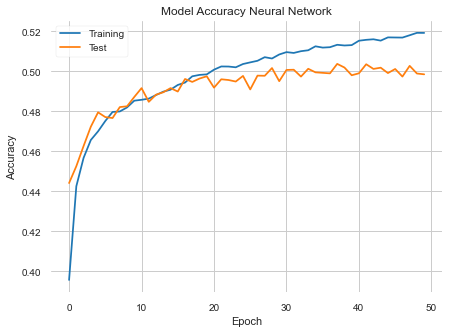

In [ ]:
# Plot the accuracy for test and train data
fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])

ax.set_title('Model Accuracy Neural Network')
ax.set_xlabel('Epoch')
#plt.xticks(np.arange(0, 1.1, step = 0.1), rotation = 'vertical')
ax.set_ylabel('Accuracy')
ax.legend(['Training', 'Test'], loc = 'best')
ax.grid()
#ax.figure.savefig(RESULTS_PATH + 'accuracy_normalized.png')
ax.figure.savefig(RESULTS_PATH + 'accuracy_standarized.png')

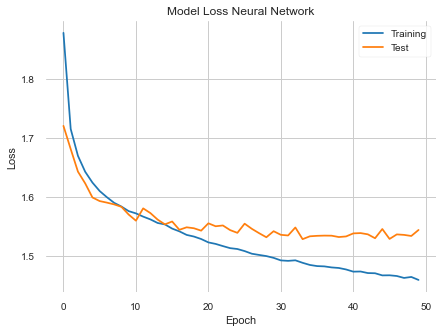

In [ ]:
# Plot the loss for test and train data
fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])

ax.set_title('Model Loss Neural Network')
ax.set_xlabel('Epoch')
#plt.xticks(np.arange(0, 1.1, step = 0.1), rotation = 'vertical')
ax.set_ylabel('Loss')
ax.legend(['Training', 'Test'], loc = 'best')
ax.grid()
#ax.figure.savefig(RESULTS_PATH + 'loss_normalized.png')
ax.figure.savefig(RESULTS_PATH + 'loss_standarized.png')

In [ ]:
index = np.random.randint(0, y_test.shape)
y_output = y_test.values[index]
prediction = model_f.predict(X_test.values[index])
print('Expected output: ', y_output, '\nPredicted output: ', prediction.argmax())

Expected output:  [25.] 
Predicted output:  25


# K-means 
Agrupar canciones solo por sus caracteristicas

In [ ]:
df_kmeans = pd.read_csv(DATA_PATH + "standirezed_data.csv").drop('artist_id', axis = 1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


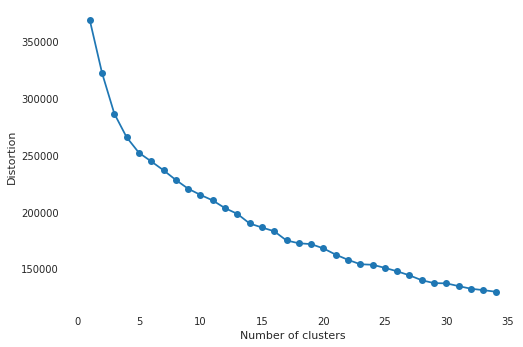

In [ ]:
# Elbow method
# Calculates distortion for a range of number of cluster
distortions = []
for i in range(1, 35):
    print(i)
    km = KMeans(
        n_clusters = i, init = 'random',
        n_init = 10, max_iter = 300,
        tol = 1e-04, random_state = 1234
    )
    km.fit(df_kmeans)
    distortions.append(km.inertia_)

# Plot
plt.plot(range(1, 35), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
silhouette = [0]
for n in range(2 , 25):
    print(n)
    algorithm = (KMeans(n_clusters = n ,init='random', n_init = 10 , max_iter=300, tol=1e-04,  random_state= 1234) )
    algorithm.fit(df_kmeans)
    labels = algorithm.labels_
    centers = algorithm.cluster_centers_
    silhouette.append(silhouette_score(df_kmeans, labels, metric = 'euclidean'))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [ ]:
plt.figure(1 , figsize = (25 ,6))
plt.plot(np.arange(1 , 25) , silhouette , 'o')
plt.plot(np.arange(1 , 25) , silhouette , '-' , alpha = 0.5)
plt.xlabel('K - Cantidad de grupos') , plt.ylabel('Siloueta')
plt.show()

estimators = [('imputer', SimpleImputer(strategy='most_frequent')), 
              ('encoder', OrdinalEncoder()),
              ]
pipe = Pipeline(estimators)
X_mod = pipe.fit_transform(X)
data_mod = pd.DataFrame(X_mod,columns=X.columns)
data_mod.head()
model.fit(X,Y)
pred1 = model.predict(X)
display(pred1)
plot_confusion_matrix(model,X,Y,display_labels=le.classes_,values_format='d')
print('----------Reporte para el Modelo 1----------')
print(classification_report(Y,pred1,target_names=le.classes_))
print('----------Reporte para el Modelo 2----------')
print(classification_report(Y,pred2,target_names=le.classes_))
param_grid = dict(imputer__num__strategy=['mean', 'median'],
                  imputer__cat__strategy=['most_frequent', 'constant'],
                  encoder=[OrdinalEncoder(), OneHotEncoder()],
                  normalize=['passthrough', MaxAbsScaler()])

grid_search = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=3,scoring='accuracy')

grid_search.fit(X,Y.ravel())
print(grid_search.best_params_)

dump(grid_search.best_estimator_, 'my_model.joblib') 

model = load('my_model.joblib') 

pred1 = model.predict(X)
print('----------Reporte para el Mejor Modelo----------')
print(classification_report(Y,pred1,target_names=le.classes_))

In [ ]:
# Hyperarameter tunning: algoritmo, K, init, max_iter

In [ ]:
km = KMeans(
    n_clusters = 3, init ='random', 
)
y_km = km.fit_predict(X)

#### Results performance